In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import Normalizer



In [179]:
# importing the data
data= pd.read_csv(r'C:\Users\kousi\Downloads\eeg1.csv')

In [180]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [181]:
data.columns

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)

In [182]:
# Checking for Null Values
print(data.isnull().sum())



# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64


In [183]:
# Removing rows with NaN values
data = data.dropna()


In [184]:
# Remove any rows with missing values
data.dropna(inplace=True)



In [185]:
# Remove any rows with infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Separate the features and target
x = data.drop('label', axis=1)
y = data['label']

In [186]:
x = data.drop('label', axis=1)
y = data['label']


C:\Users\kousi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


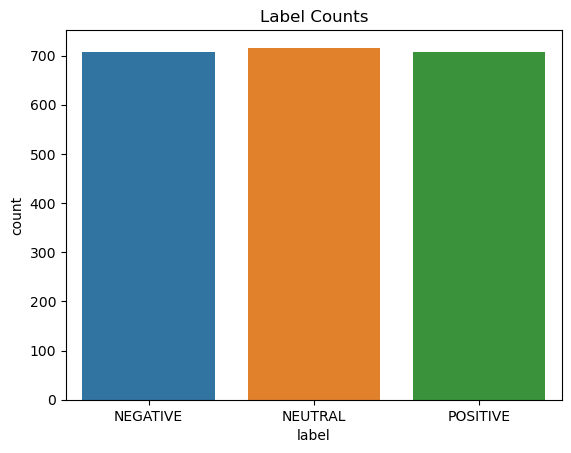

In [187]:
sns.countplot(data['label'])
plt.title('Label Counts')
plt.show()


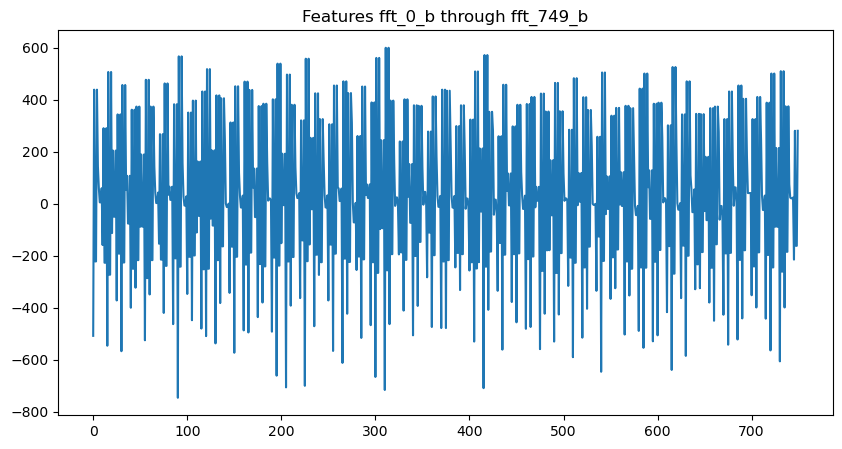

In [188]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(10,5))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [189]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])


In [190]:
feature_names = list(data.columns)[:-1]

In [191]:
y = data.iloc[:, :-1]  # all columns except the last one
y = data.iloc[:, -1]   # only the last column


In [192]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,0
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,1
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,2
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,2
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,1


In [193]:
# Encoding categorical variables
class_encoding = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2, '0': 0, '1': 1, '2': 2}


In [194]:
# Feature Scaling
scaler = StandardScaler()
data.iloc[:, 1:-1] = scaler.fit_transform(data.iloc[:, 1:-1])


In [195]:
# Normalizing Data
normalizer = Normalizer()
data.iloc[:, 1:-1] = normalizer.fit_transform(data.iloc[:, 1:-1])
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [196]:
# Splitting Data into Train and Test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [211]:
# Model Building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [212]:
models = [('Decision Tree', DecisionTreeClassifier()),
          ('Support Vector Machine', SVC()),
          ('K-Nearest Neighbors', KNeighborsClassifier()),
          ('Logistic Regression', LogisticRegression()),
          ('Random Forest', RandomForestClassifier()),]

In [213]:
for i in range(len(models)):
    name = models[i][0]
    model = models[i][1]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy}")

Decision Tree accuracy: 0.9531615925058547
Support Vector Machine accuracy: 0.8711943793911007


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors accuracy: 0.9039812646370023


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.9320843091334895
Random Forest accuracy: 0.9882903981264637


In [214]:
from sklearn.metrics import classification_report

for name, model in models:
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred)
    print(f"{name} classification report:\n{report}")


Decision Tree classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       143
           1       0.98      0.98      0.98       148
           2       0.93      0.92      0.93       136

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427

Support Vector Machine classification report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       143
           1       0.94      0.95      0.95       148
           2       0.93      0.71      0.80       136

    accuracy                           0.87       427
   macro avg       0.88      0.87      0.87       427
weighted avg       0.88      0.87      0.87       427

K-Nearest Neighbors classification report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       143
   

C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [215]:
print("----------------------")
print("------Random Forest------")

rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(x_train, y_train) 
rfy_pred = rf.predict(x_test)

print()
print("------Classification Report------")
print(classification_report(rfy_pred, y_test))

print()
print("------Accuracy------")
print("Random Forest Accuracy:", rf.score(x_test, y_test))
rfc = round(accuracy_score(rfy_pred, y_test) * 100)


----------------------
------Random Forest------

------Classification Report------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       1.00      1.00      1.00       148
           2       0.99      0.99      0.99       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427


------Accuracy------
Random Forest Accuracy: 0.990632318501171


In [216]:


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

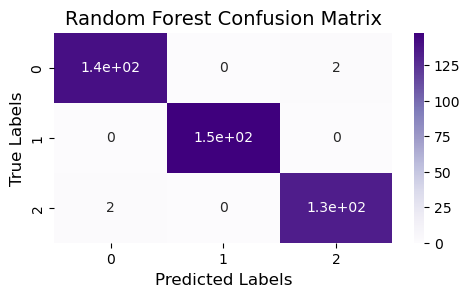

In [217]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix for Random Forest model
rf_y_pred = rf_model.predict(x_test)
conf_matrix_rf = confusion_matrix(y_test, rf_y_pred)

# Visualize confusion matrix
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix_rf, annot=True, cmap='Purples')
plt.title('Random Forest Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12, color='black')
plt.ylabel('True Labels', fontsize=12, color='black')
plt.show()


In [220]:
print('Training accuracy:', model.score(x_train, y_train))
print('Testing accuracy:', model.score(x_test, y_test))


Training accuracy: 1.0
Testing accuracy: 0.9882903981264637


In [224]:
import joblib

# Save the model to a file
joblib.dump(model, 'eegmodel.joblib')


['eegmodel.joblib']